In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('mnist_train.csv')

In [3]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import numpy as np
import tensorflow as tf              # tensorflow 기본
from tensorflow.keras.models import Sequential # 모델 Box 정의
from tensorflow.keras.layers import Flatten, Dense # 모델 BOX의 Input Layer와 Output Layer

from tensorflow.keras.optimizers import SGD # 알고리즘 담당
from sklearn.model_selection import train_test_split # train, test 데이터를 분리
from sklearn.preprocessing import MinMaxScaler # 데이터 정규화 - 큰 숫자를 작은 숫자로 변경 (-1 ~ + 1)

In [5]:
X_data = df.drop('label',axis=1)

In [6]:
X_data.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y_data = df['label']

In [8]:
y_data.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [9]:
# 픽셀 데이터를 정규화(0~1 사이의 실수로 변환)
scaler = MinMaxScaler()                    # scaler 객체 생성
scaler.fit(X_data)                         # scaler 객체를 학습
normal_x_data = scaler.transform(X_data)   # scaler를 통해서 실제값을 변환

In [10]:
norm_train_x_data, norm_test_x_data, train_y_data, test_y_data = train_test_split(normal_x_data,y_data,test_size=0.3)

In [11]:
norm_train_x_data = norm_test_x_data.reshape(-1,28,28,1)
norm_test_x_data = norm_test_x_data.reshape(-1,28,28,1)

In [12]:
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [13]:
model = Sequential()

In [14]:
# Convolution
model.add(Conv2D(
    filters=32,
    kernel_size=(3,3),
    strides=(1,1),
    activation='relu',
    input_shape=(28,28,1)))

In [15]:
model.add(Conv2D(
    filters=64,
    kernel_size=(3,3),
    strides=(1,1),
    activation='relu'))

In [16]:
model.add(MaxPool2D(pool_size=(2,2)))

In [17]:
model.add(Conv2D(
    filters=64,
    kernel_size=(3,3),
    strides=(1,1),
    activation='relu'))

In [18]:
# FC layer(DNN) 의: input layer
model.add(Flatten(input_shape=())) # 전체 4차원 에서 2차원으로 바꿔주는것

In [19]:
# hidden Layer
model.add(Dense(units=256, activation='relu'))

In [20]:
# output layer
model.add(Dense(units=10, activation='softmax'))

In [21]:
# model이 어떻게 동작하는지를 지정
model.compile(optimizer=SGD(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [34]:
# 설정을 모두 마치었으면 모델 학습
history = model.fit(norm_train_x_data,train_y_data, epochs = 30,
             verbose= 1,
             validation_split=0.2)

Epoch 1/30
450/450 [==============================] - 14s 32ms/step - loss: 2.3012 - accuracy: 0.1100 - val_loss: 2.3025 - val_accuracy: 0.1028
Epoch 2/30
450/450 [==============================] - 15s 32ms/step - loss: 2.3011 - accuracy: 0.1101 - val_loss: 2.3025 - val_accuracy: 0.1069
Epoch 3/30
450/450 [==============================] - 14s 32ms/step - loss: 2.3011 - accuracy: 0.1099 - val_loss: 2.3025 - val_accuracy: 0.1061
Epoch 4/30
450/450 [==============================] - 15s 32ms/step - loss: 2.3010 - accuracy: 0.1108 - val_loss: 2.3025 - val_accuracy: 0.1069
Epoch 5/30
450/450 [==============================] - 14s 31ms/step - loss: 2.3009 - accuracy: 0.1110 - val_loss: 2.3025 - val_accuracy: 0.1056
Epoch 6/30
450/450 [==============================] - 14s 31ms/step - loss: 2.3009 - accuracy: 0.1119 - val_loss: 2.3025 - val_accuracy: 0.1053
Epoch 7/30
450/450 [==============================] - 14s 31ms/step - loss: 2.3008 - accuracy: 0.1128 - val_loss: 2.3026 - val_accuracy:

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 256)               1638656   
                                                        

In [36]:
model.evaluate(norm_test_x_data, test_y_data)

563/563 [==============================] - 4s 7ms/step - loss: 2.3030 - accuracy: 0.1374


[2.3029887676239014, 0.13744445145130157]

In [37]:
import matplotlib.pyplot as plt

In [38]:
acc = history.history['accuracy']
loss= history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

In [39]:
epochs = range(len(acc))

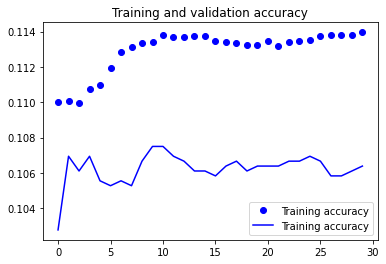

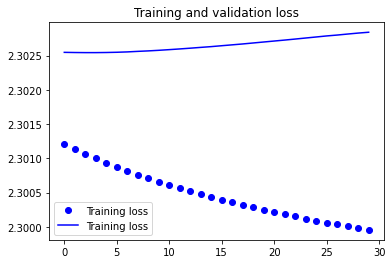

In [40]:
plt.plot(epochs, acc, 'bo', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Training accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()